# Importing the libraries and the datasheet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("Heart_data.csv")
df

,HeartDisease,BMI,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,bad_habbits
0,No,16.60,No,3.0,30.0,No,F,55-59,NaN,Yes,Yes,Very good,5.0,Yes,No,Yes,"{'Smoking' 'Yes', 'AlcoholDrinking' 'No'}"
1,No,20.34,Yes,0.0,0.0,No,F,80 or older,NaN,No,Yes,Very good,NaN,No,No,No,"{'Smoking' 'No', 'AlcoholDrinking' 'No'}"
2,No,26.58,No,20.0,30.0,No,Male,65-69,NaN,Yes,Yes,Fair,8.0,Yes,No,No,"{'Smoking' 'Yes', 'AlcoholDrinking' 'No'}"
3,No,24.21,No,0.0,0.0,No,F,75-79,NaN,No,No,Good,6.0,No,No,Yes,"{'Smoking' 'No', 'AlcoholDrinking' 'No'}"
4,No,23.71,No,28.0,0.0,Yes,F,40-44,NaN,No,Yes,Very good,8.0,No,No,No,"{'Smoking' 'No', 'AlcoholDrinking' 'No'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,No,7.0,0.0,Yes,M,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,"{'Smoking' 'Yes', 'AlcoholDrinking' 'No'}"
319791,No,29.84,No,0.0,0.0,No,M,NaN,Hispanic,No,Yes,Very good,5.0,Yes,No,No,"{'Smoking' 'Yes', 'AlcoholDrinking' 'No'}"
319792,No,24.24,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,"{'Smoking' 'No', 'AlcoholDrinking' 'No'}"
319793,No,32.81,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,"{'Smoking' 'No', 'AlcoholDrinking' 'No'}"


# Checking for null values and cleaning the datasheet


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               309896 non-null  float64
 2   Stroke            319795 non-null  object 
 3   PhysicalHealth    319795 non-null  float64
 4   MentalHealth      319795 non-null  float64
 5   DiffWalking       319795 non-null  object 
 6   Sex               319795 non-null  object 
 7   AgeCategory       299245 non-null  object 
 8   Race              283950 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         222044 non-null  float64
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
 15  SkinCancer        319795 non-null  object 
 16  bad_habbits       31

In [3]:
df.duplicated().sum()

10373

In [4]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [5]:
df['HeartDisease'] = df['HeartDisease'].replace('No', False)

In [6]:
df['HeartDisease'] = df['HeartDisease'].replace('Yes', True)

In [7]:
df['Stroke'] = df['Stroke'].replace('Yes', True)
df['Stroke'] = df['Stroke'].replace('No', False)

In [8]:
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309422 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      309422 non-null  bool   
 1   BMI               309422 non-null  float64
 2   Stroke            309422 non-null  bool   
 3   PhysicalHealth    309422 non-null  float64
 4   MentalHealth      309422 non-null  float64
 5   DiffWalking       309422 non-null  object 
 6   Sex               309422 non-null  object 
 7   AgeCategory       289438 non-null  object 
 8   Race              274135 non-null  object 
 9   Diabetic          309422 non-null  object 
 10  PhysicalActivity  309422 non-null  object 
 11  GenHealth         309422 non-null  object 
 12  SleepTime         216451 non-null  float64
 13  Asthma            309422 non-null  object 
 14  KidneyDisease     309422 non-null  object 
 15  SkinCancer        309422 non-null  object 
 16  bad_habbits       30

In [10]:
df['DiffWalking'] = df['DiffWalking'].replace('Yes', True)
df['DiffWalking'] = df['DiffWalking'].replace('No', False)


In [11]:
df['Sex'].unique()

array(['F', 'Male', 'Female', 'M'], dtype=object)

In [12]:
df['Sex'].replace('Male', 'M', inplace = True)
df['Sex'].replace('Female', 'F', inplace = True)

In [13]:
print(df['AgeCategory'].value_counts())
print(df['AgeCategory'].unique())


65-69          32713
60-64          32233
70-74          30019
55-59          28524
50-54          24437
80 or older    23697
75-79          21081
45-49          21035
18-24          20464
40-44          20337
30-34          18293
25-29          16605
Name: AgeCategory, dtype: int64
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' nan '30-34' '25-29']


In [14]:
df.replace({'AgeCategory': {'55-59': random.randint(55, 59), '80 or older':random.randint(80, 84),
                            '65-69':random.randint(65, 69),'75-79':random.randint(75,79),
                            '40-44':random.randint(40, 44),'70-74':random.randint(70, 74),
                            '60-64':random.randint(60, 64),'50-54':random.randint(50, 54),
                            '45-49':random.randint(45, 49),'18-24':random.randint(18, 24),
                            '30-34':random.randint(30, 34),'25-29':random.randint(25, 29)}}, inplace =True)
df.rename(columns = {'AgeCategory':'Age'}, inplace = True)

In [15]:
mean = df['Age'].mean()
df['Age'].fillna(int(mean), inplace =True)


In [16]:
df['Race'].value_counts(dropna=False)

White                             199932
NaN                                35287
Hispanic                           27224
Black                              22850
Other                              10908
Asian                               8028
American Indian/Alaskan Native      5193
Name: Race, dtype: int64

In [17]:
df['Race'].fillna('White', inplace =True)

In [18]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [19]:
df.replace({'Diabetic': {'No, borderline diabetes': False, 'Yes (during pregnancy)': True,
                         'Yes': True, 'No' : False}}, inplace = True)

In [20]:
df.replace({'PhysicalActivity': {'Yes': True, 'No' : False}}, inplace = True)

In [21]:
df['SleepTime'].fillna(df['SleepTime'].mean(), inplace = True)

In [22]:
df.replace({'Asthma': {'Yes': True, 'No' : False}}, inplace = True)

In [23]:
df.replace({'KidneyDisease': {'Yes': True, 'No' : False}}, inplace = True)

In [24]:
df.replace({'SkinCancer': {'Yes': True, 'No' : False}}, inplace = True)

In [25]:
df['bad_habbits'].value_counts()

{'Smoking'  'No', 'AlcoholDrinking'  'No'}      171572
{'Smoking'  'Yes', 'AlcoholDrinking'  'No'}     116173
{'Smoking'  'Yes', 'AlcoholDrinking'  'Yes'}     13352
{'Smoking'  'No', 'AlcoholDrinking'  'Yes'}       8325
Name: bad_habbits, dtype: int64

In [26]:
# custom number of splits
dfCopy = df['bad_habbits'].str.split(',', expand=True)
print(dfCopy[0].value_counts())
print(dfCopy[1].value_counts())

{'Smoking'  'No'     179897
{'Smoking'  'Yes'    129525
Name: 0, dtype: int64
 'AlcoholDrinking'  'No'}     287745
 'AlcoholDrinking'  'Yes'}     21677
Name: 1, dtype: int64


In [27]:
dfCopy.rename(columns = {0:'Smokes', 1:'DrinksAlcohol'}, inplace = True)

In [28]:
dfCopy.replace({'Smokes': {"{'Smoking'  'No'": False, "{'Smoking'  'Yes'":True}}, inplace =True)


In [29]:
dfCopy.replace({'DrinksAlcohol':{" 'AlcoholDrinking'  'No'}": False, " 'AlcoholDrinking'  'Yes'}":True }}, inplace =True)

In [30]:
df = df.assign(**dfCopy)

In [31]:
df.drop(columns='bad_habbits', inplace = True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309422 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      309422 non-null  bool   
 1   BMI               309422 non-null  float64
 2   Stroke            309422 non-null  bool   
 3   PhysicalHealth    309422 non-null  float64
 4   MentalHealth      309422 non-null  float64
 5   DiffWalking       309422 non-null  bool   
 6   Sex               309422 non-null  object 
 7   Age               309422 non-null  float64
 8   Race              309422 non-null  object 
 9   Diabetic          309422 non-null  bool   
 10  PhysicalActivity  309422 non-null  bool   
 11  GenHealth         309422 non-null  object 
 12  SleepTime         309422 non-null  float64
 13  Asthma            309422 non-null  bool   
 14  KidneyDisease     309422 non-null  bool   
 15  SkinCancer        309422 non-null  bool   
 16  Smokes            30

# Analysing the data and their relations

In [34]:
df.columns


Index(['HeartDisease', 'BMI', 'Stroke', 'PhysicalHealth', 'MentalHealth',
       'DiffWalking', 'Sex', 'Age', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'Smokes', 'DrinksAlcohol'],
      dtype='object')

# Trying the different pipeline models

In [257]:
##dfCopy = df.replace({'Sex': {"M": 1, "F":0},'Race':{'White':0, 'Black':1, 'Asian':3, 'American Indian/Alaskan Native':4,
    ##   'Other':5, 'Hispanic':6}, 'GenHealth':{'Very good':3, 'Fair':1, 'Good':2, 'Poor':0, 'Excellent':4} } )

In [258]:
##dfCopy

,HeartDisease,BMI,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Age,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Smokes,DrinksAlcohol
0,False,16.60,False,3.0,30.0,False,0,58.0,0,True,True,3,5.000000,True,False,True,True,False
1,False,20.34,True,0.0,0.0,False,0,82.0,0,False,True,3,7.128611,False,False,False,False,False
2,False,26.58,False,20.0,30.0,False,1,66.0,0,True,True,1,8.000000,True,False,False,True,False
3,False,24.21,False,0.0,0.0,False,0,79.0,0,False,False,2,6.000000,False,False,True,False,False
4,False,23.71,False,28.0,0.0,True,0,41.0,0,False,True,3,8.000000,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,True,27.41,False,7.0,0.0,True,1,64.0,6,True,False,1,6.000000,True,False,False,True,False
319791,False,29.84,False,0.0,0.0,False,1,55.0,6,False,True,3,5.000000,True,False,False,True,False
319792,False,24.24,False,0.0,0.0,False,0,49.0,6,False,True,2,6.000000,False,False,False,False,False
319793,False,32.81,False,0.0,0.0,False,0,27.0,6,False,False,2,12.000000,False,False,False,False,False


In [259]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,[1,2,3,4,5,7,9,10,12,13,14,15,16,17]],
                                                 df.iloc[:,[0]],test_size=0.2,random_state=1)

In [260]:
#Logistic Regression Pipeline
LogisticRegressionPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LogisticRegression())])

In [261]:
#Decision tree Pipeline
DecisionTreePipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])

In [262]:
#Random Forest Pipeline
RandomForestPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])

In [263]:
## Defining the pipelines in a list
The_Pipelined_Models = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [264]:
# Creating dictionary of pipelines and training models
PipelineDict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

# Fit the pipelines
for pipe in The_Pipelined_Models:
    pipe.fit(X_train, y_train)

D:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [265]:
#getting test accuracy for all classifiers
for i,model in enumerate(The_Pipelined_Models):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.9121434919608952
Decision Tree Test Accuracy: 0.8654116506423204
Random Forest Test Accuracy: 0.8949018340470227


In [266]:
#Defining variables for choosing best model 
accuracy  = 0.0
classifier= 0
pipeline  = ""

In [267]:
#Choosing best model for the given data "Automatically"
for i,model in enumerate(The_Pipelined_Models):
    if model.score(X_test,y_test)>accuracy:
        accuracy=model.score(X_test,y_test)
        pipeline=model
        classifier=i
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

Classifier with best accuracy:Logistic Regression


In [268]:
preds = LogisticRegressionPipeline.predict(X_test)

In [269]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [270]:
cf_matrix = confusion_matrix(y_test, preds) 
cf_matrix

array([[56265,   226],
       [ 5211,   183]], dtype=int64)

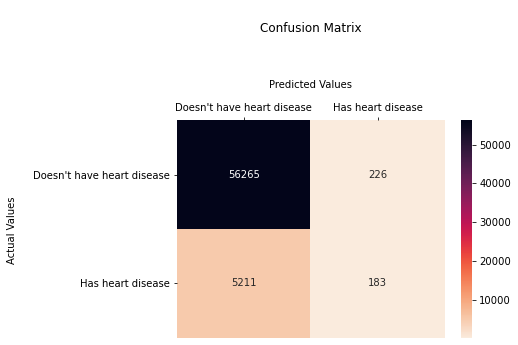

In [271]:
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='1', cmap='rocket_r')

ax.set_title('\nConfusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values\n') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('Actual Values \n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Doesn't have heart disease" ,'Has heart disease'])
ax.xaxis.tick_top() 
ax.yaxis.set_ticklabels(["Doesn't have heart disease" ,'Has heart disease'], rotation =0)

## Display the visualization of the Confusion Matrix.
plt.show()

In [272]:
recall_score(y_test, preds)

0.0339265850945495

In [273]:
accuracy_score(y_test, preds)

0.9121434919608952

In [274]:
precision_score(y_test, preds)

0.4474327628361858

In [275]:
preds = RandomForestPipeline.predict(X_test)

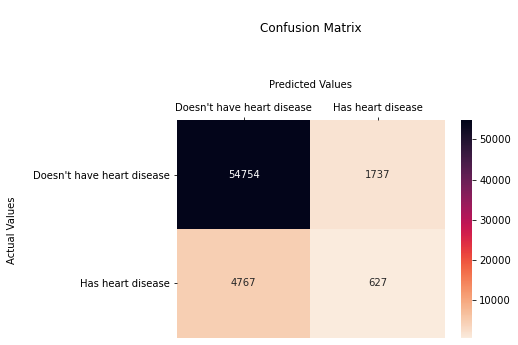

In [276]:
cf_matrix = confusion_matrix(y_test, preds) 

ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='1', cmap='rocket_r')

ax.set_title('\nConfusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values\n') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('Actual Values \n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Doesn't have heart disease" ,'Has heart disease'])
ax.xaxis.tick_top() 
ax.yaxis.set_ticklabels(["Doesn't have heart disease" ,'Has heart disease'], rotation =0)

## Display the visualization of the Confusion Matrix.
plt.show()



In [277]:
recall_score(y_test, preds)


0.11624026696329255

In [278]:
accuracy_score(y_test, preds)

0.8949018340470227

In [279]:
precision_score(y_test, preds)

0.2652284263959391

# Trying the heirarchial clustering

In [280]:
from sklearn.preprocessing import normalize
numbersOnlyData = df.drop(columns =['Race', 'GenHealth','Sex'])
data_scaled = normalize(numbersOnlyData)
data_scaled = pd.DataFrame(data_scaled, columns=numbersOnlyData.columns)
data_scaled

,HeartDisease,BMI,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Age,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,Smokes,DrinksAlcohol
0,0.000000,0.245326,0.000000,0.044336,0.44336,0.000000,0.857163,0.014779,0.014779,0.073893,0.014779,0.0,0.014779,0.014779,0.0
1,0.000000,0.239867,0.011793,0.000000,0.00000,0.000000,0.967015,0.000000,0.011793,0.084067,0.000000,0.0,0.000000,0.000000,0.0
2,0.000000,0.331461,0.000000,0.249406,0.37411,0.000000,0.823041,0.012470,0.012470,0.099763,0.012470,0.0,0.000000,0.012470,0.0
3,0.000000,0.292215,0.000000,0.000000,0.00000,0.000000,0.953530,0.000000,0.000000,0.072420,0.000000,0.0,0.012070,0.000000,0.0
4,0.000000,0.426314,0.000000,0.503450,0.00000,0.017980,0.737195,0.000000,0.017980,0.143843,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309417,0.014232,0.390089,0.000000,0.099621,0.00000,0.014232,0.910825,0.014232,0.000000,0.085390,0.014232,0.0,0.000000,0.014232,0.0
309418,0.000000,0.475184,0.000000,0.000000,0.00000,0.000000,0.875842,0.000000,0.015924,0.079622,0.015924,0.0,0.000000,0.015924,0.0
309419,0.000000,0.440685,0.000000,0.000000,0.00000,0.000000,0.890824,0.000000,0.018180,0.109080,0.000000,0.0,0.000000,0.000000,0.0
309420,0.000000,0.743096,0.000000,0.000000,0.00000,0.000000,0.611509,0.000000,0.000000,0.271782,0.000000,0.0,0.000000,0.000000,0.0


MemoryError: Unable to allocate 357. GiB for an array with shape (47870832331,) and data type float64

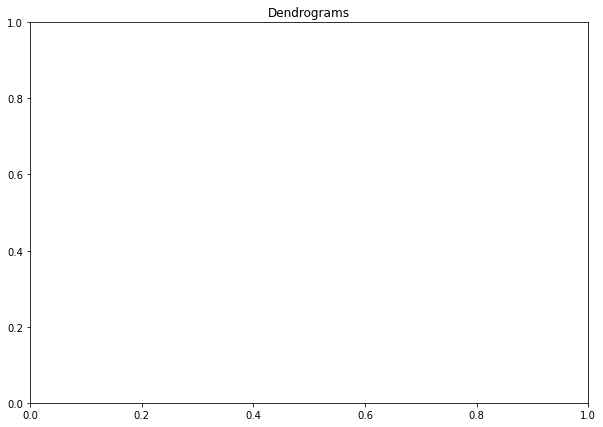

In [281]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [ ]:
#MemoryError: Unable to allocate 357. GiB for an array with shape (47870832331,) and data type float64
#nvm lol

# Asking questions

## Is there a relation between age, drinking and heart diseases?

In [349]:
sns.set_style('dark')

Text(0.5, 0.98, 'Relation between age, drinking and heart diseases')

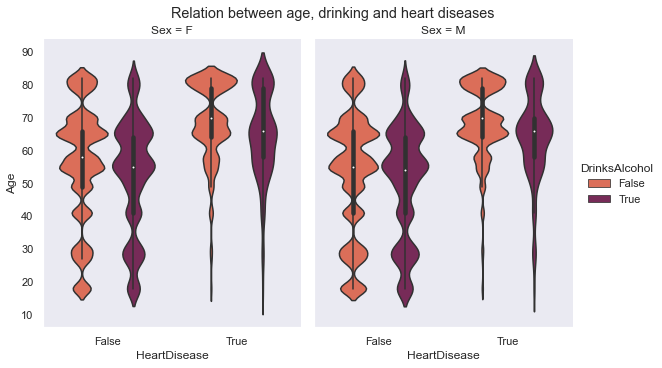

In [352]:
graph = sns.catplot(x="HeartDisease", y="Age",
                hue="DrinksAlcohol", col="Sex",
                data=df, kind="violin",
                dodge=True,
                height=5, aspect=.8, palette = 'rocket_r');
graph.fig.subplots_adjust(top=0.89)
graph.fig.suptitle('Relation between age, drinking and heart diseases')


## Is there a relation between age, smoking and heart diseases?

Text(0.5, 0.98, 'Relation between age, smoking and heart diseases')

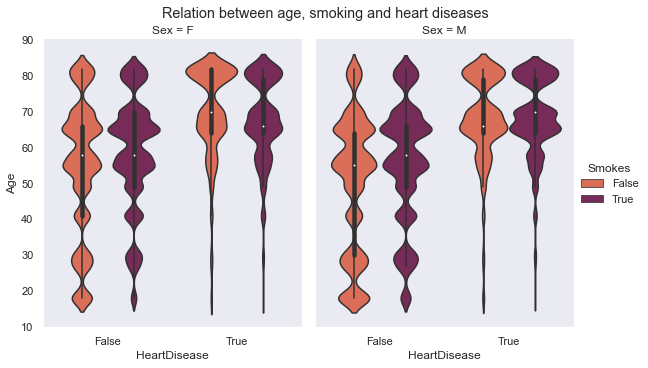

In [344]:
graph = sns.catplot(x="HeartDisease", y="Age",
                hue="Smokes", col="Sex",
                data=df, kind="violin",
                dodge=True,
                height=5, aspect=.8, palette = 'rocket_r');
graph.fig.subplots_adjust(top=0.89)
graph.fig.suptitle('Relation between age, smoking and heart diseases')


## Does physical activity change with age, and having a heart disease?

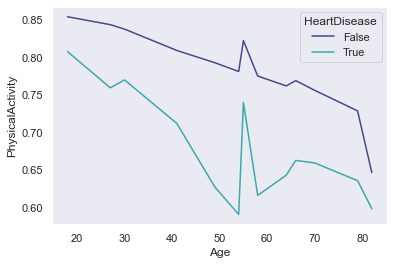

In [358]:
graph = sns.lineplot(x = "Age" , y = "PhysicalActivity" 
                     , hue = "HeartDisease" , data = df , ci = None , markers = True, palette = 'mako')

## What about physical health?

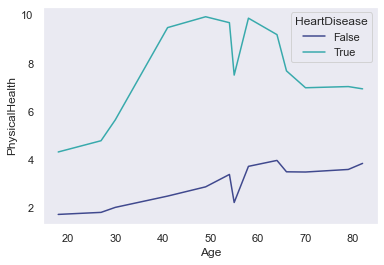

In [359]:
graph = sns.lineplot(x = "Age" , y = "PhysicalHealth" 
                     , hue = "HeartDisease" , data = df , ci = None , markers = True, palette = 'mako')

## Which race expreinces the most amount of heart disease? 

Text(0.5, 1.0, 'Relation between heart diseases and race')

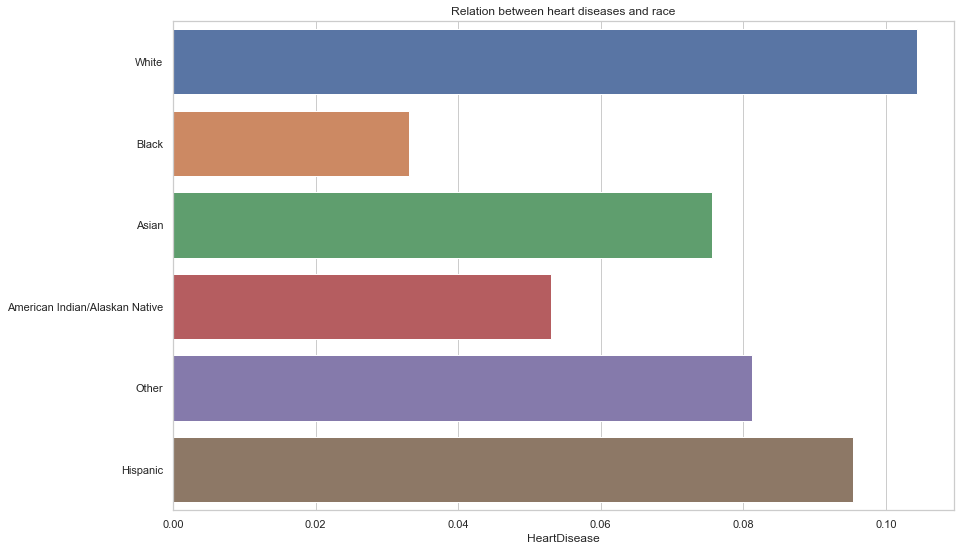

In [421]:
topRaces = df.groupby("Race")["HeartDisease"].mean()
plt.figure(figsize=(14,9))
sns.barplot(x = topRaces , y = df["Race"].unique()).set_title("Relation between heart diseases and race")

In [377]:
df['Race'].value_counts()

White                             235219
Hispanic                           27224
Black                              22850
Other                              10908
Asian                               8028
American Indian/Alaskan Native      5193
Name: Race, dtype: int64

## Is there a relation between BMI and race?

Text(0.5, 1.0, 'Relation between BMI and race')

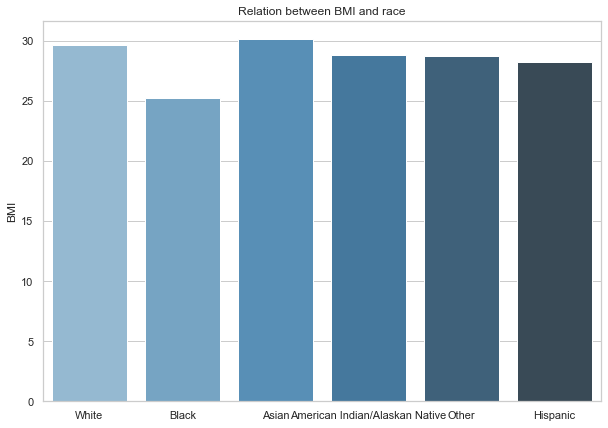

In [396]:
sns.set_theme(style="whitegrid")
topRaces = df.groupby("Race")["BMI"].mean()
plt.figure(figsize=(10,7))
sns.barplot(y = topRaces , x = df["Race"].unique(), palette ='Blues_d').set_title("Relation between BMI and race")

## Is diabetes related to heart disease?

Text(0.5, 0.98, 'Number of people with diabetes and heart disease')

<Figure size 864x504 with 0 Axes>

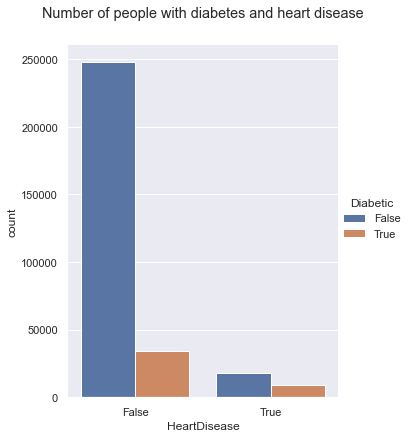

In [401]:
#using count plot.
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
graph = sns.catplot(data = df , x="HeartDisease",
             hue = 'Diabetic', kind="count",
                dodge=True,
                height=6, aspect=.8,)
graph.fig.subplots_adjust(top=0.89)
graph.fig.suptitle("Number of people with diabetes and heart disease")

## The number of people who have had heart disease and experienced strokes.

Text(0.5, 0.98, 'Number of people who have had heart disease and experienced strokes')

<Figure size 864x504 with 0 Axes>

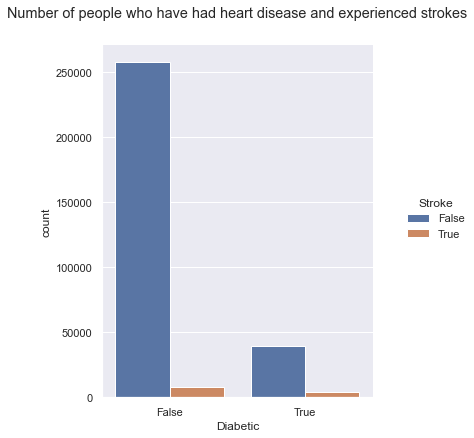

In [404]:
#using count plot.
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
graph = sns.catplot(data = df , x="Diabetic",
             hue = 'Stroke', kind="count",
                dodge=True,
                height=6, aspect=.8,)
graph.fig.subplots_adjust(top=0.89)
graph.fig.suptitle("Number of people who have had heart disease and experienced strokes")

## Does sleep time really affect the probability of having a stroke?

Text(0.5, 1.0, 'The relationship between strokes and sleeptime')

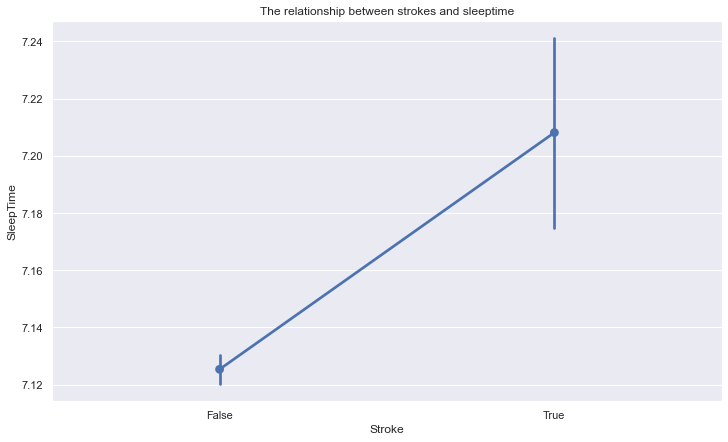

In [405]:
#using point plot.
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.pointplot(x="Stroke" , y = "SleepTime", data = df).set_title("The relationship between strokes and sleeptime")

## Do people feel less healthy as they age?

Text(0.5, 1.0, 'Relation between general health and age')

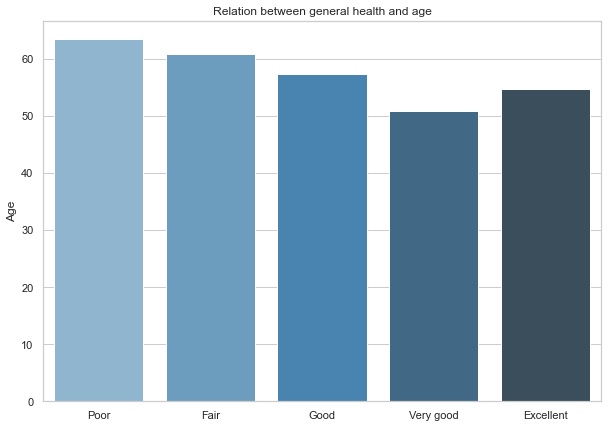

In [408]:
sns.set_theme(style="whitegrid")
topRaces = df.groupby("GenHealth")["Age"].mean()
plt.figure(figsize=(10,7))
order = ['Poor','Fair','Good','Very good','Excellent']
sns.barplot(y = topRaces , x = df["GenHealth"].unique(), palette ='Blues_d', order = order
           ).set_title("Relation between general health and age")

## Number of people with asthma and how much of them smoke.

Text(0.5, 0.98, 'Number of people with and without asthma who smoke')

<Figure size 864x504 with 0 Axes>

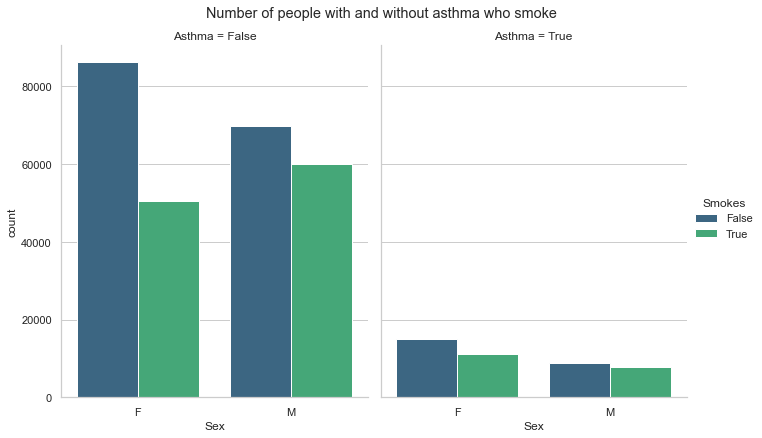

In [420]:
#using count plot.
plt.figure(figsize=(12,7))
sns.set_theme(style="whitegrid")
graph = sns.catplot(data = df , x="Sex",
             hue = 'Smokes', kind="count", col ='Asthma',
                dodge=True,
                height=6, aspect=.8,palette = 'viridis')
graph.fig.subplots_adjust(top=0.89)
graph.fig.suptitle("Number of people with and without asthma who smoke")